In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data_visualizition/data_asset/global_traffic_accidents.csv'
df = pd.read_csv(file_path)
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [55]:
df.dropna(subset=['Date', 'Time', 'Cause', 'Weather Condition', 'Road Condition'], inplace=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df['Hour'] = df['Datetime'].dt.hour
df['Date only'] = df['Datetime'].dt.date

In [56]:
df

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Datetime,Hour,Date only
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,2023-04-19 06:39:00,6,2023-04-19
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,2023-01-17 02:47:00,2,2023-01-17
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,2024-04-09 02:55:00,2,2024-04-09
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,2023-10-10 11:23:00,11,2023-10-10
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,2023-01-02 12:07:00,12,2023-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving,2023-01-10 18:41:00,18,2023-01-10
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions,2023-04-04 16:48:00,16,2023-04-04
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions,2024-09-30 14:43:00,14,2024-09-30
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving,2024-10-27 18:34:00,18,2024-10-27


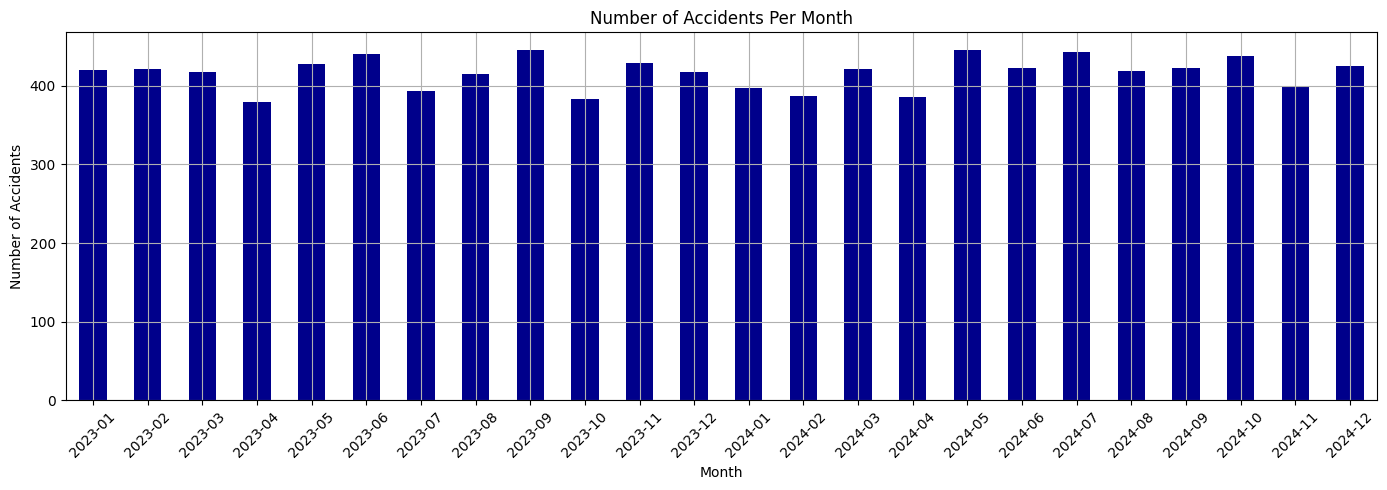

In [57]:
df['Date only'] = pd.to_datetime(df['Date only'])

accidents_per_month = df.groupby(df['Date only'].dt.to_period('M')).size()

accidents_per_month.index = accidents_per_month.index

plt.figure(figsize=(14, 5))
accidents_per_month.plot(kind='bar', color='darkblue')
plt.title('Number of Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


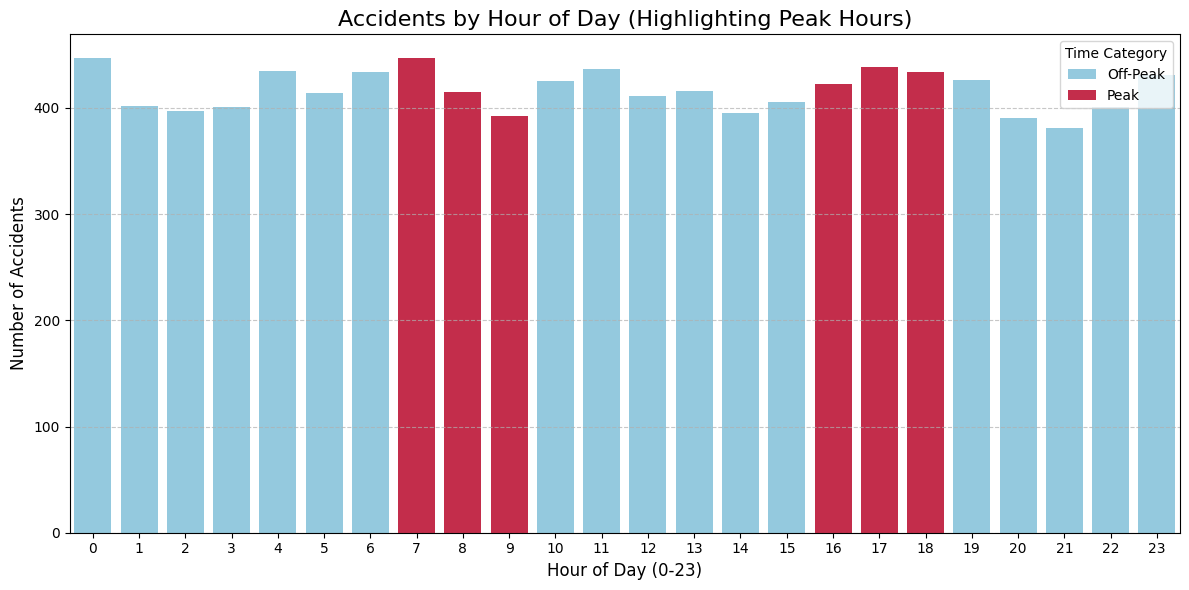

In [58]:
df['Hour'] = df['Hour'].astype(int)

# Đếm số vụ tai nạn theo giờ
hour_counts = df['Hour'].value_counts().sort_index()

# Tạo DataFrame từ dữ liệu
hour_df = pd.DataFrame({
    'Hour': hour_counts.index,
    'accidents': hour_counts.values
})

# Đánh dấu giờ cao điểm: 7–9 và 16–18
hour_df['peak'] = hour_df['Hour'].apply(lambda x: 'Peak' if 7 <= x <= 9 or 16 <= x <= 18 else 'Off-Peak')

# Vẽ biểu đồ với màu khác nhau cho giờ cao điểm
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='accidents', data=hour_df, hue='peak', palette={'Peak': 'crimson', 'Off-Peak': 'skyblue'}, dodge=False)

# Trang trí
plt.title('Accidents by Hour of Day (Highlighting Peak Hours)', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Time Category')
plt.tight_layout()
plt.show()


<ipython-input-64-3644736529>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette='Set2')


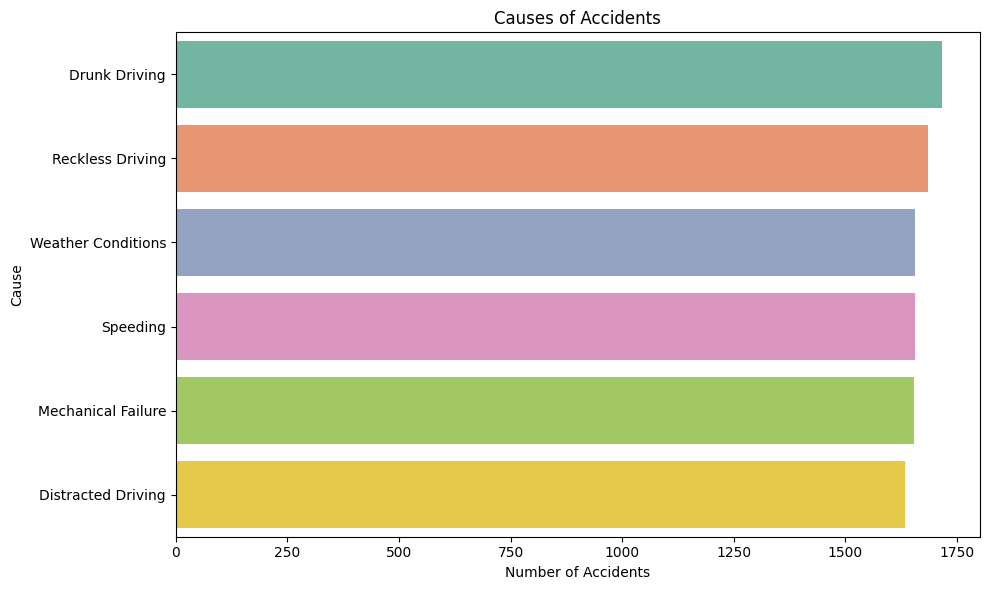

In [64]:
# 3. Bar chart: Most Frequent Causes
top_causes = df['Cause'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes.values, y=top_causes.index, palette='Set2')
plt.title('Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause')
plt.tight_layout()
plt.show()

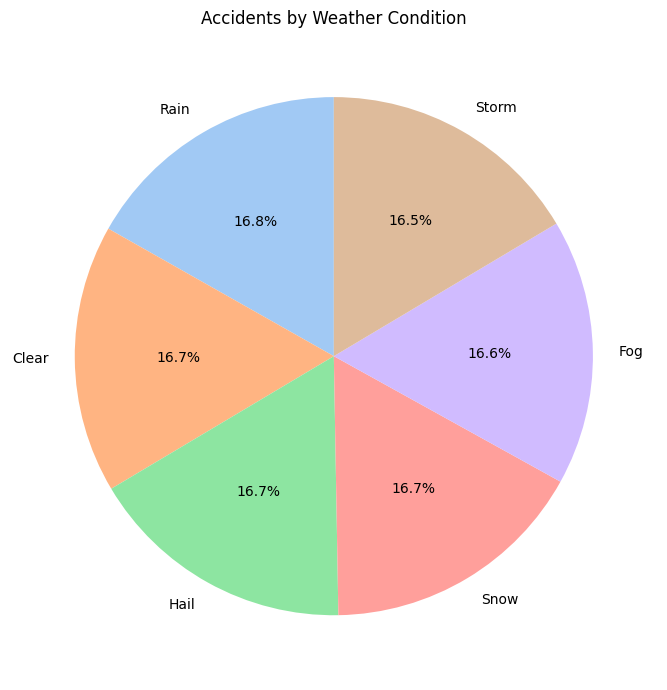

In [60]:
# 4. Pie chart: Weather Conditions
weather_counts = df['Weather Condition'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Accidents by Weather Condition')
plt.tight_layout()
plt.show()

In [61]:
# Nhóm điều kiện thời tiết
bad_weather = ['Rain', 'Fog', 'Snow', 'Storm', 'Hail']
df['weather_type'] = df['Weather Condition'].apply(lambda x: 'Bad Weather' if x in bad_weather else 'Clear')


<ipython-input-62-3883101224>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather_type', data=df, palette=['#FF9999', '#99CCFF'])


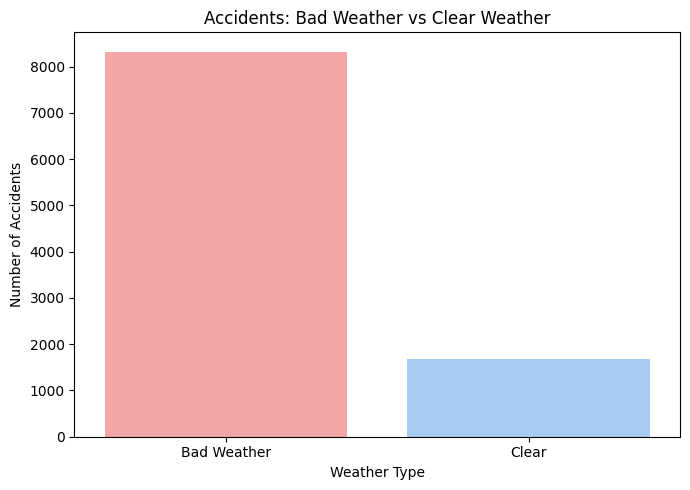

In [62]:
plt.figure(figsize=(7, 5))
sns.countplot(x='weather_type', data=df, palette=['#FF9999', '#99CCFF'])
plt.title('Accidents: Bad Weather vs Clear Weather')
plt.xlabel('Weather Type')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


<ipython-input-63-2143680965>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_counts.index, y=road_counts.values, palette='coolwarm')


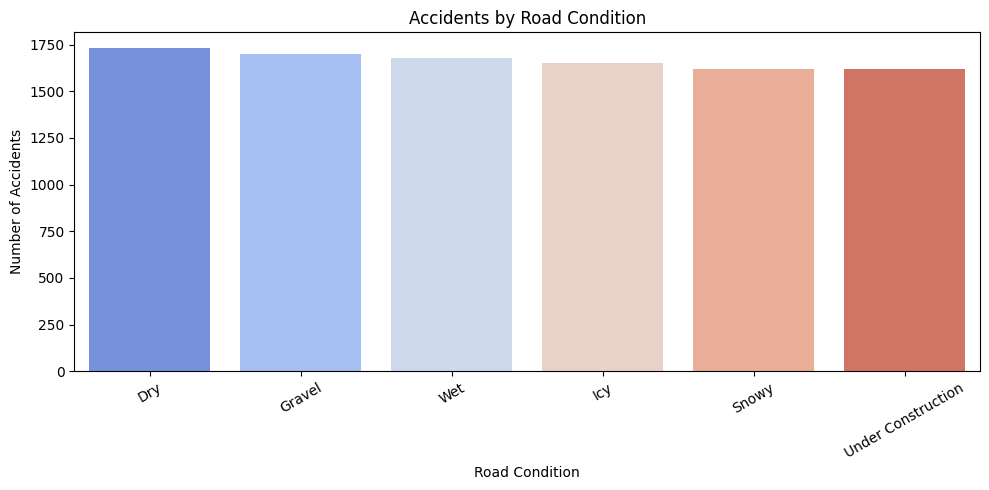

In [63]:
# 5. Bar chart: Road Conditions
road_counts = df['Road Condition'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=road_counts.index, y=road_counts.values, palette='coolwarm')
plt.title('Accidents by Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Road Condition
Dry                   5.111625
Under Construction    4.993820
Gravel                4.971210
Snowy                 4.967244
Icy                   4.943134
Wet                   4.937500
Name: Casualties, dtype: float64


<ipython-input-51-2319058804>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_casualties.index, y=avg_casualties.values, palette='coolwarm')


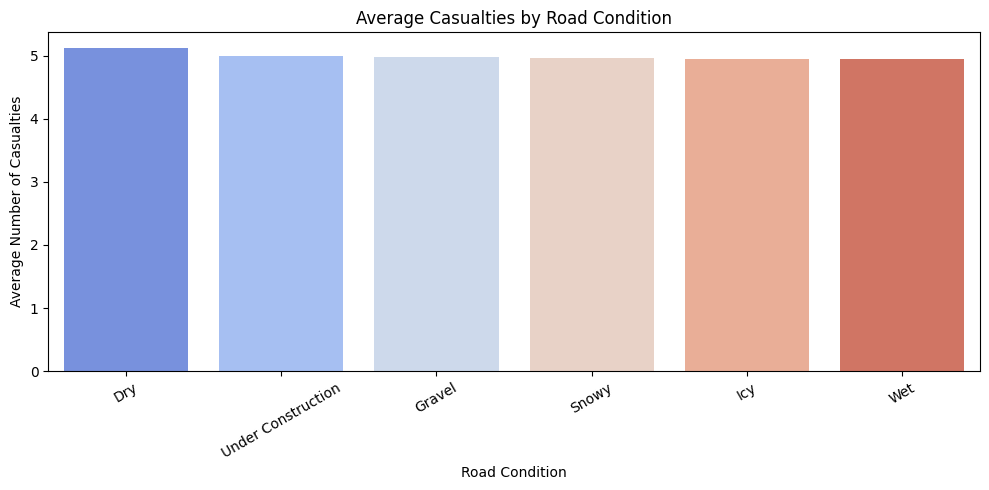

In [51]:
avg_casualties = df.groupby('Road Condition')['Casualties'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_casualties.index, y=avg_casualties.values, palette='coolwarm')
plt.ylabel('Average Number of Casualties')
plt.title('Average Casualties by Road Condition')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
